In [2]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [3]:
from google.colab import files
uploaded = files.upload()

Saving solar_flare_cleaned.csv to solar_flare_cleaned.csv


/tmp/ipython-input-3798650365.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=events_per_year.index.astype(int), y=events_per_year.values, palette="flare")


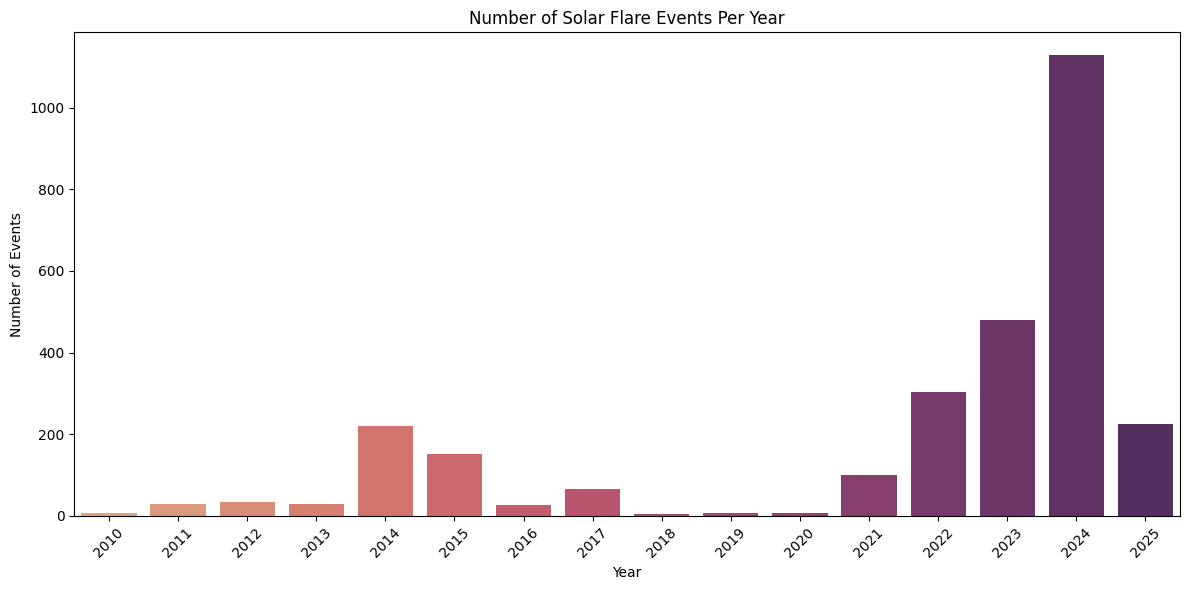

In [4]:
# Feature engineering
# Step 2: Load and preprocess data
df = pd.read_csv("solar_flare_cleaned.csv")  # make sure the file is in your working directory
#####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("solar_flare_cleaned.csv")

# Convert beginTime to datetime
df['beginTime'] = pd.to_datetime(df['beginTime'], errors='coerce')

# Extract year
df['year'] = df['beginTime'].dt.year

# Drop rows with invalid dates
df = df.dropna(subset=['year'])

# Count events per year
events_per_year = df['year'].value_counts().sort_index()

# Plot the number of solar flare events per year
plt.figure(figsize=(12, 6))
sns.barplot(x=events_per_year.index.astype(int), y=events_per_year.values, palette="flare")

plt.title("Number of Solar Flare Events Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-473295987.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_labels, y=events_per_month.values, palette="crest")


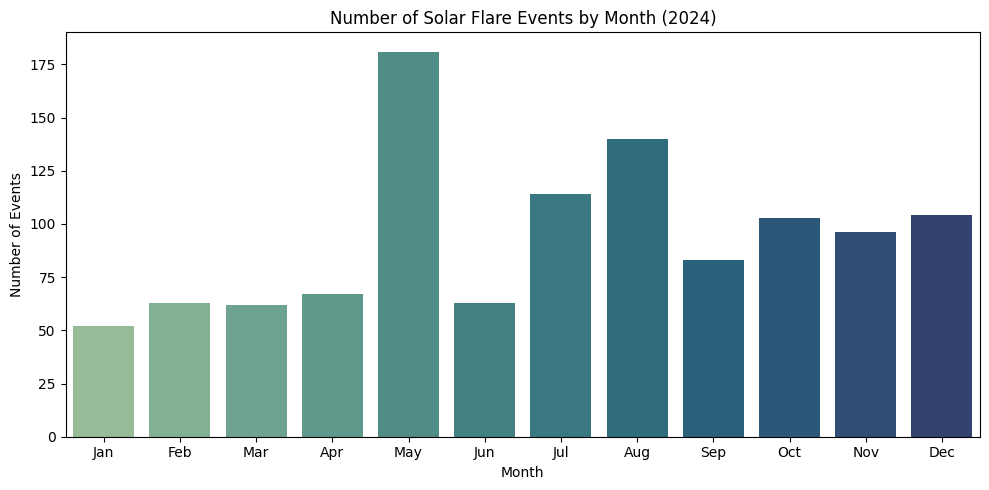

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("solar_flare_cleaned.csv")

# Convert beginTime to datetime
df['beginTime'] = pd.to_datetime(df['beginTime'], errors='coerce')

# Extract year and month
df['year'] = df['beginTime'].dt.year
df['month'] = df['beginTime'].dt.month

# Filter only for the year 2024
df_2024 = df[df['year'] == 2024]

# Count events per month in 2024
events_per_month = df_2024['month'].value_counts().sort_index()

# Month names for x-axis labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=month_labels, y=events_per_month.values, palette="crest")

plt.title("Number of Solar Flare Events by Month (2024)")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()


In [6]:
# Feature engineering
df['beginTime'] = pd.to_datetime(df['beginTime'])
df['month'] = df['beginTime'].dt.month
df['day'] = df['beginTime'].dt.day
df['hour'] = df['beginTime'].dt.hour
df = df.drop(columns=['beginTime'])
df = pd.get_dummies(df, columns=['classType'], drop_first=True)



In [7]:
# Split into features (X) and target (y)
X = df.drop(columns=['EventOccurred'])
y = df['EventOccurred']


In [8]:
# Step 3: Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [9]:
# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [10]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)



In [11]:
# Print the sizes of the train and test sets
print("Preprocessing complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Preprocessing complete.
Training samples: 4438
Testing samples: 1110


In [12]:
# Step 6: Define the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # First hidden layer
model.add(Dense(units=32, activation='relu'))  # Second hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer (binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 7: Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Step 8: Train the model
epochs = 10  # You can adjust the number of epochs here
batch_size = 32  # You can adjust the batch size here
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7973 - loss: 0.5913 - val_accuracy: 0.9919 - val_loss: 0.0858
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9946 - loss: 0.0639 - val_accuracy: 0.9964 - val_loss: 0.0228
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0126 - val_accuracy: 0.9964 - val_loss: 0.0202
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.9973 - val_loss: 0.0139
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.9973 - val_loss: 0.0136
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9973 - val_loss: 0.0135
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 7.5372e-04 - val_accuracy: 0.9973 - val_loss: 0.0137
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.2839e-04 - val_accu

In [15]:
# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0135
Test Loss: 0.014659364707767963
Test Accuracy: 0.9972972869873047


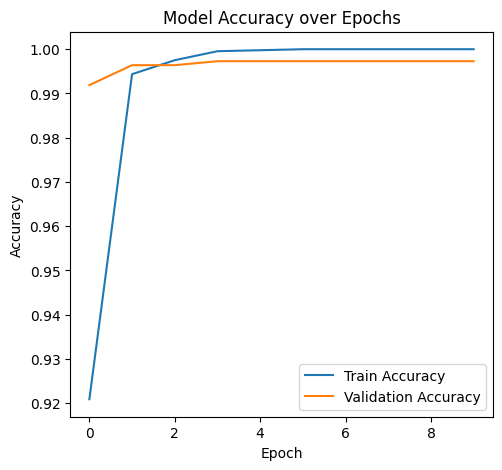

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

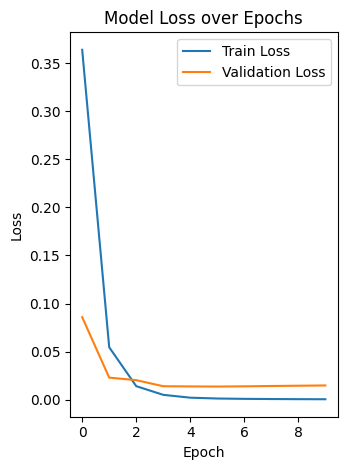

In [17]:

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
import pickle

# Suppose your model is named 'model'
with open('solar_flare_model.pckl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as solar_flare_model.pckl")

Model saved as solar_flare_model.pckl


In [19]:
from IPython.display import FileLink

# For .h5 file
display(FileLink('solar_flare_model.h5'))

# For .pckl file
display(FileLink('solar_flare_model.pckl'))


/content/solar_flare_model.h5

/content/solar_flare_model.pckl

In [20]:
from google.colab import files

files.download('solar_flare_model.h5')
files.download('solar_flare_model.pckl')


FileNotFoundError: Cannot find file: solar_flare_model.h5

In [21]:
model.save("solarflare_model.h5")

In [22]:
from google.colab import files
files.download("solarflare_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
from sklearn.preprocessing import StandardScaler

# Example dummy data (replace this with your actual training features)
X_train = [[0, 1, 2], [1, 3, 5], [0, 2, 1]]

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [26]:
from google.colab import files
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
scaler.fit(X_train)  # Use the same training features
joblib.dump(scaler, "models/scaler.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'models/scaler.pkl'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('solar_flare_cleaned.csv')  # Replace with your actual file name

# Print column names to find the correct date column
print("Available columns:", df.columns)

# Try alternative common column names
for col in ['event_date', 'start_time', 'date', 'begin_time', 'timestamp']:
    if col in df.columns:
        df['parsed_date'] = pd.to_datetime(df[col], errors='coerce')
        break
else:
    raise KeyError("No valid date column found. Please check your column names.")

# Extract year
df['year'] = df['parsed_date'].dt.year

# Count events by year
yearly_counts = df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='orange')
plt.title('Solar Flare Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()
